# Assignment 13

#### by Anchalee P Ramirez

#### 1. Change the encoding_dim through various values (range(2,18,2) and store or keep of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot.

#### 2. Using the previous assignment's model of detecting images, how does the accuracy change when you run the digit-prediction model on these 'decoded' values?

In [1]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

    
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

C:\Users\Anchee\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


((60000, 784), (10000, 784))

##### encoding_dim = 2

In [105]:
encoding_dim = 2

x = input_img = Input(shape=(784,))

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)


autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [106]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [107]:
autoencoder.fit(xtrain, xtrain, 
                epochs=20, 
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.3767 - val_loss: 0.2652
Epoch 2/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2601 - val_loss: 0.2563
Epoch 3/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.2538 - val_loss: 0.2526
Epoch 4/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.2502 - val_loss: 0.2464
Epoch 5/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.2420 - val_loss: 0.2387
Epoch 6/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.2374 - val_loss: 0.2360
Epoch 7/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.2346 - val_loss: 0.2329
Epoch 8/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.2323 - val_loss: 0.2306
Epoch 9/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2306 - val_

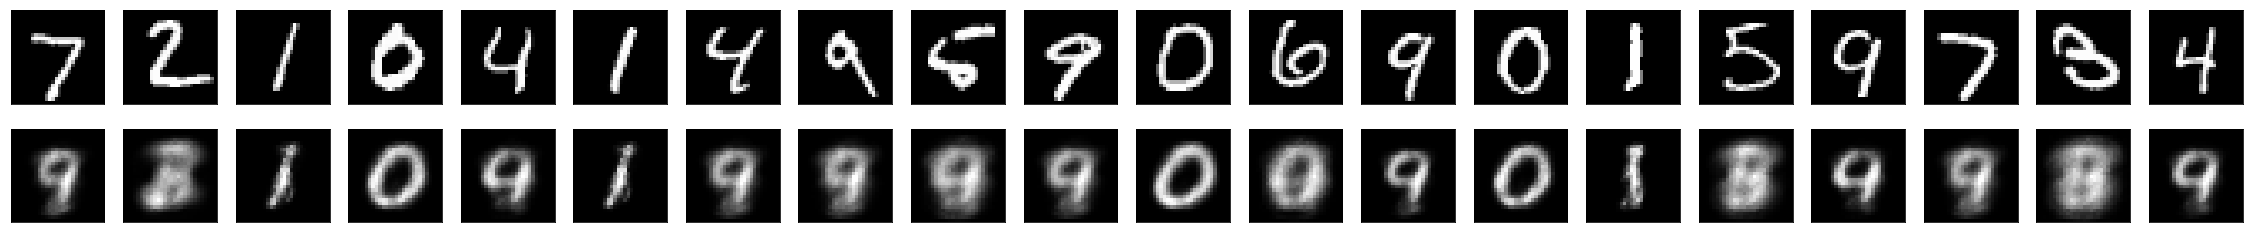

In [108]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 20 # how many digits we will display
plt.figure(figsize=(40,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [109]:
encoded_imgs

array([[ 9.929621 , 10.774276 ],
       [ 1.1961323,  4.6836815],
       [ 9.224276 , 36.34751  ],
       ...,
       [ 8.875711 ,  9.655257 ],
       [ 2.2904866,  5.3843703],
       [ 7.6312065,  2.3201911]], dtype=float32)

##### encoding_dim = 4

In [11]:
encoding_dim = 4

x = input_img = Input(shape=(784,))

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)


autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [12]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [13]:
autoencoder.fit(xtrain, xtrain, 
                epochs=20, 
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.3882 - val_loss: 0.2638
Epoch 2/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.2588 - val_loss: 0.2542
Epoch 3/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.2476 - val_loss: 0.2432
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.2396 - val_loss: 0.2353
Epoch 5/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.2262 - val_loss: 0.2166
Epoch 6/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.2138 - val_loss: 0.2102
Epoch 7/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.2086 - val_loss: 0.2058
Epoch 8/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.2042 - val_loss: 0.2022
Epoch 9/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.1999 - val_lo

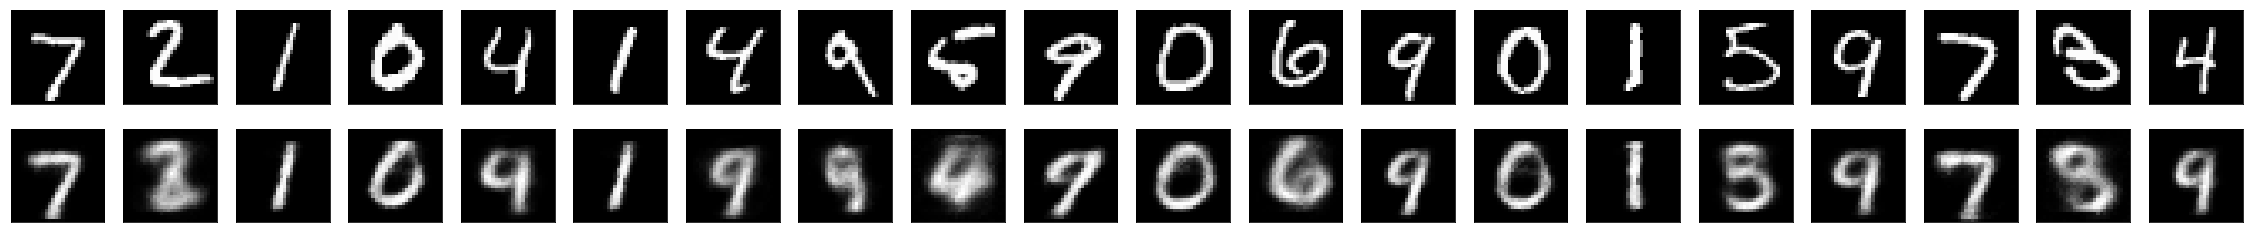

In [14]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 20 # how many digits we will display
plt.figure(figsize=(40,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
encoded_imgs

array([[ 1.5370669,  2.7496338, 22.485903 , 10.664395 ],
       [ 1.0687472,  7.4402742,  4.8153477,  4.4805403],
       [ 2.0791824, 23.251303 , 30.48791  , 27.93999  ],
       ...,
       [13.012093 ,  5.8352785, 19.307096 , 17.568258 ],
       [11.744527 ,  7.4410706, 11.597047 , 17.012426 ],
       [26.098917 , 11.423423 , 12.003184 , 13.884643 ]], dtype=float32)

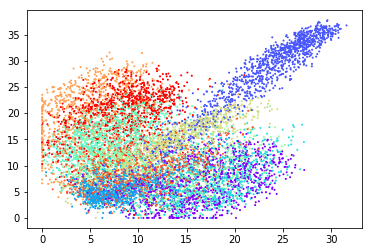

In [17]:
%matplotlib inline
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')

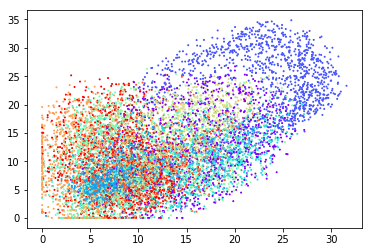

In [18]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')

##### encoding_dim = 6

In [20]:
encoding_dim = 6

x = input_img = Input(shape=(784,))

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)


autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [21]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [22]:
autoencoder.fit(xtrain, xtrain, 
                epochs=20, 
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.3482 - val_loss: 0.2640
Epoch 2/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.2574 - val_loss: 0.2495
Epoch 3/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.2425 - val_loss: 0.2343
Epoch 4/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.2295 - val_loss: 0.2253
Epoch 5/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.2236 - val_loss: 0.2202
Epoch 6/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.2169 - val_loss: 0.2120
Epoch 7/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.2082 - val_loss: 0.2042
Epoch 8/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.2019 - val_loss: 0.1986
Epoch 9/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.1943 - val_

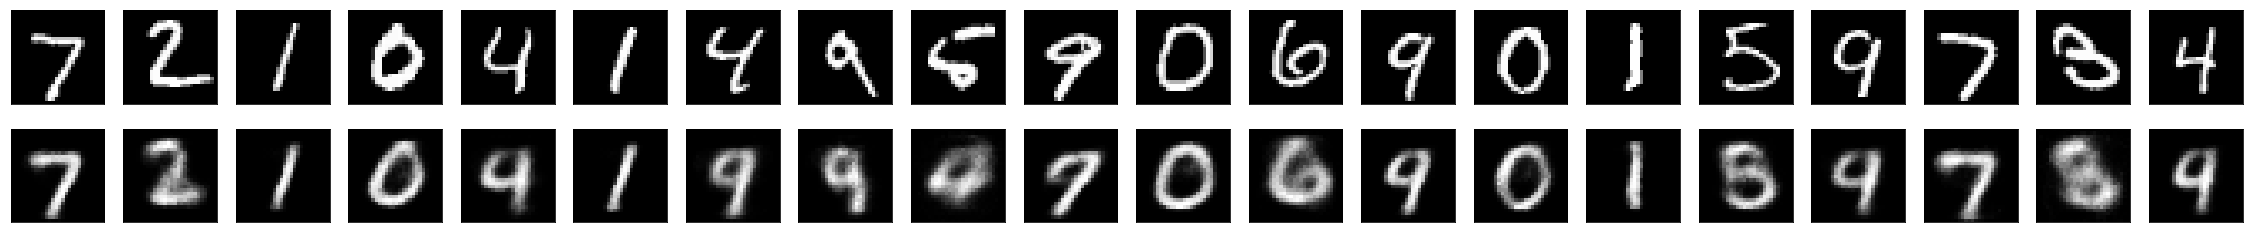

In [23]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 20 # how many digits we will display
plt.figure(figsize=(40,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
encoded_imgs

array([[ 4.0530667 ,  0.72150797, 18.452524  , 21.14477   , 10.868812  ,
         0.        ],
       [16.092546  , 11.011921  ,  3.5896125 ,  5.008346  , 14.247646  ,
         0.        ],
       [12.318823  ,  0.45575804, 17.153322  ,  7.105593  , 26.284492  ,
         0.        ],
       ...,
       [ 6.914189  , 10.451151  , 23.0184    , 16.936783  , 13.206142  ,
         0.        ],
       [ 8.091142  , 11.246935  , 16.787407  ,  8.426664  ,  8.539185  ,
         0.        ],
       [25.220308  , 26.353338  , 14.636384  , 20.883701  , 11.630438  ,
         0.        ]], dtype=float32)

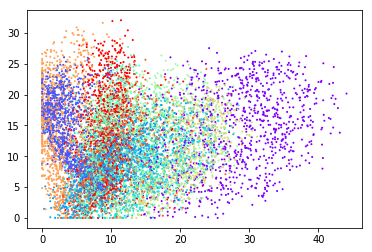

In [25]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')

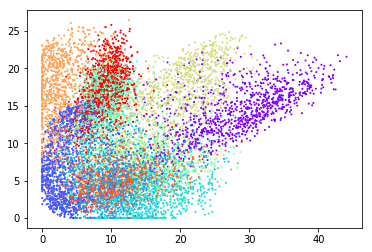

In [26]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')

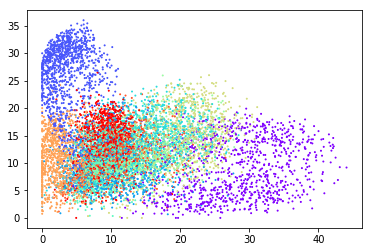

In [27]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,4], s=1, c=ytest, cmap='rainbow')

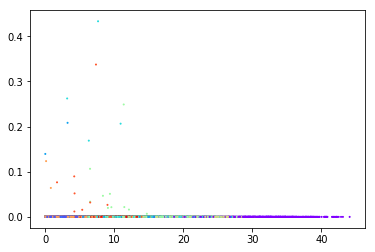

In [28]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,5], s=1, c=ytest, cmap='rainbow')

##### encoding_dim = 8

In [128]:
encoding_dim = 8

x = input_img = Input(shape=(784,))

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)


autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [129]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [130]:
autoencoder.fit(xtrain, xtrain, 
                epochs=20, 
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.3178 - val_loss: 0.2621
Epoch 2/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.2569 - val_loss: 0.2520
Epoch 3/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.2431 - val_loss: 0.2336
Epoch 4/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.2266 - val_loss: 0.2215
Epoch 5/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.2159 - val_loss: 0.2100
Epoch 6/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.2076 - val_loss: 0.2055
Epoch 7/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.1994 - val_loss: 0.1942
Epoch 8/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.1884 - val_loss: 0.1837
Epoch 9/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.1811 - val_

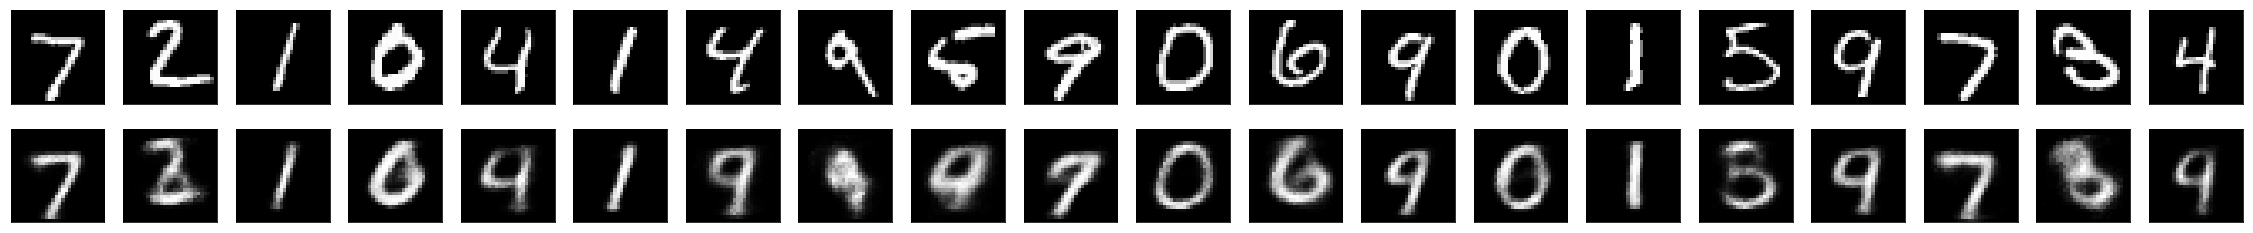

In [131]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 20 # how many digits we will display
plt.figure(figsize=(40,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [132]:
encoded_imgs

array([[15.790952 ,  1.5658215,  3.723866 , ...,  0.       , 10.146023 ,
         2.184823 ],
       [ 3.7908425, 11.273541 , 19.229767 , ...,  0.       ,  7.536784 ,
         5.928112 ],
       [17.096415 ,  2.212469 , 24.524126 , ...,  0.       ,  3.946758 ,
         1.6632341],
       ...,
       [21.003939 ,  6.6985836,  9.685287 , ...,  0.       , 12.634646 ,
        13.852227 ],
       [19.095762 , 10.887237 , 10.303266 , ...,  0.       , 10.510434 ,
         4.7764072],
       [13.319389 , 31.10662  , 18.215939 , ...,  0.       , 13.788772 ,
        16.010704 ]], dtype=float32)

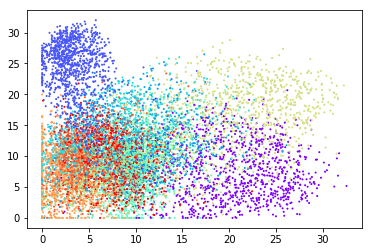

In [133]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')

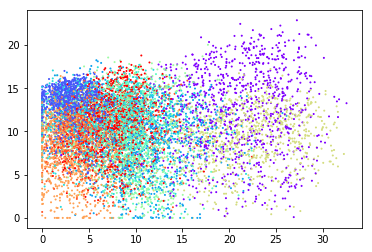

In [134]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')

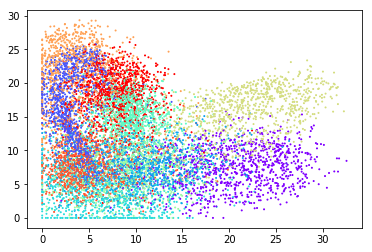

In [135]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,4], s=1, c=ytest, cmap='rainbow')

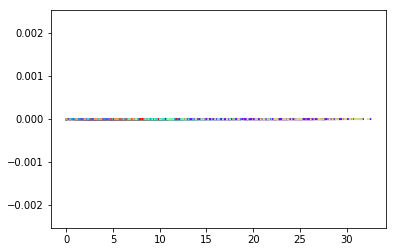

In [136]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,5], s=1, c=ytest, cmap='rainbow')

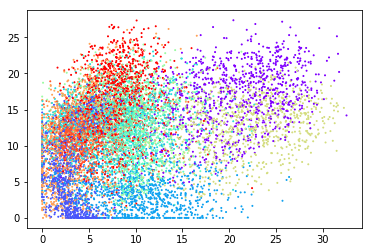

In [137]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,6], s=1, c=ytest, cmap='rainbow')

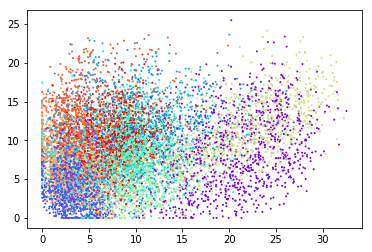

In [138]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,7], s=1, c=ytest, cmap='rainbow')

##### encoding_dim = 10

In [40]:
encoding_dim = 10

x = input_img = Input(shape=(784,))

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)


autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [41]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [42]:
autoencoder.fit(xtrain, xtrain, 
                epochs=20, 
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.3215 - val_loss: 0.2629
Epoch 2/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.2572 - val_loss: 0.2524
Epoch 3/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.2433 - val_loss: 0.2323
Epoch 4/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.2261 - val_loss: 0.2195
Epoch 5/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.2145 - val_loss: 0.2095
Epoch 6/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.2046 - val_loss: 0.1966
Epoch 7/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.1928 - val_loss: 0.1900
Epoch 8/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.1853 - val_loss: 0.1811
Epoch 9/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.1787 - val_

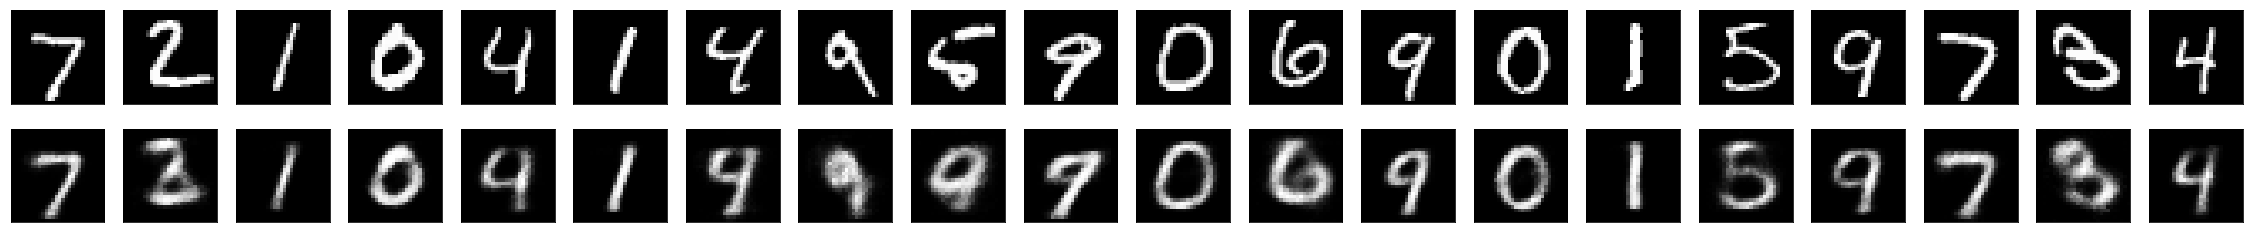

In [43]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 20 # how many digits we will display
plt.figure(figsize=(40,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [44]:
encoded_imgs

array([[ 0.        ,  2.146789  ,  7.3322396 , ..., 15.181344  ,
        19.064293  , 11.48029   ],
       [ 0.        , 13.100151  , 12.876145  , ...,  0.        ,
         4.961413  , 12.209638  ],
       [ 0.        ,  0.40516344, 23.581242  , ...,  3.027363  ,
        16.399614  , 10.550351  ],
       ...,
       [ 0.        ,  2.1229765 ,  9.397695  , ..., 14.6489315 ,
         5.830532  ,  5.9544945 ],
       [ 0.        ,  7.420021  ,  5.0193934 , ...,  3.4722967 ,
         9.263478  ,  0.76127076],
       [ 0.        , 26.894997  , 10.221928  , ...,  8.536746  ,
         5.366592  ,  2.2343202 ]], dtype=float32)

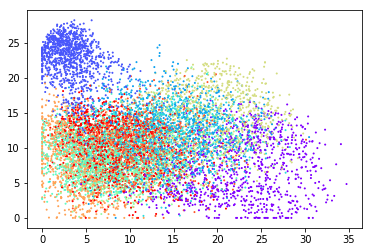

In [45]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')

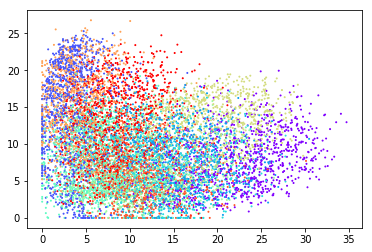

In [46]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')

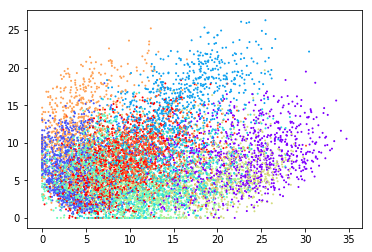

In [47]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,4], s=1, c=ytest, cmap='rainbow')

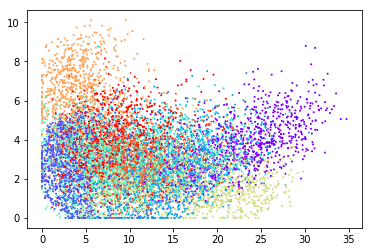

In [48]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,5], s=1, c=ytest, cmap='rainbow')

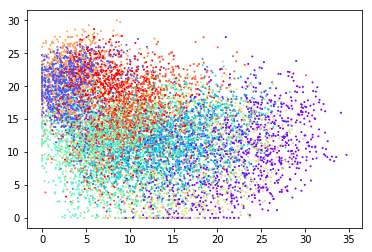

In [49]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,6], s=1, c=ytest, cmap='rainbow')

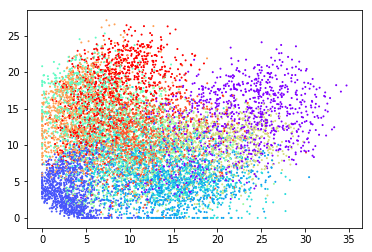

In [50]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,7], s=1, c=ytest, cmap='rainbow')

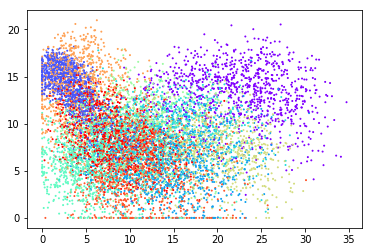

In [51]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,8], s=1, c=ytest, cmap='rainbow')

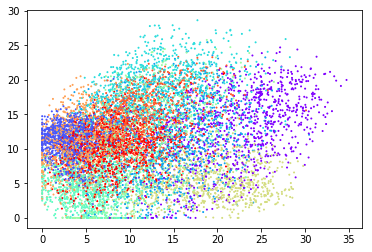

In [52]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,9], s=1, c=ytest, cmap='rainbow')

##### encoding_dim = 12

In [53]:
encoding_dim = 12

x = input_img = Input(shape=(784,))

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)


autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [54]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [55]:
autoencoder.fit(xtrain, xtrain, 
                epochs=20, 
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.3628 - val_loss: 0.2644
Epoch 2/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.2583 - val_loss: 0.2545
Epoch 3/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.2479 - val_loss: 0.2418
Epoch 4/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.2375 - val_loss: 0.2321
Epoch 5/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2266 - val_loss: 0.2210
Epoch 6/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.2169 - val_loss: 0.2090
Epoch 7/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.2026 - val_loss: 0.1934
Epoch 8/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.1887 - val_loss: 0.1831
Epoch 9/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.1816 - val_

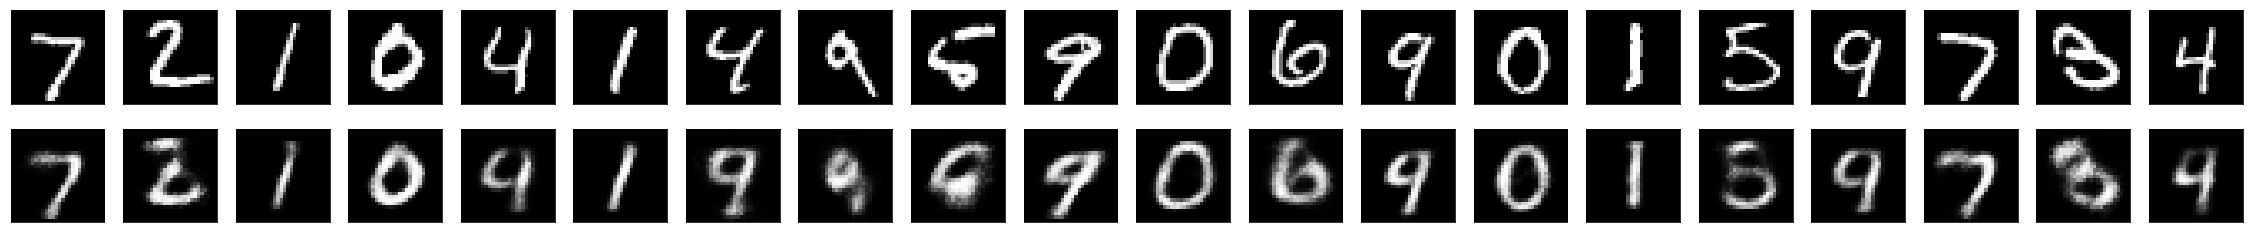

In [56]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 20 # how many digits we will display
plt.figure(figsize=(40,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [57]:
encoded_imgs

array([[19.307577 ,  8.447493 ,  6.1433225, ...,  2.818098 , 17.560633 ,
         7.7400403],
       [ 1.1610982, 10.536518 ,  7.4043455, ...,  1.0968981,  8.2260685,
        11.48566  ],
       [11.463542 ,  8.5274515,  3.9858124, ...,  2.5590818,  5.91621  ,
         3.2911057],
       ...,
       [20.674738 ,  5.2533364, 13.28342  , ...,  5.9429817,  4.512625 ,
         9.278397 ],
       [14.738679 ,  2.3501527,  4.304911 , ...,  3.05969  ,  5.739143 ,
        10.421159 ],
       [10.947681 , 13.34663  , 17.668568 , ...,  4.1835136,  3.1298683,
        18.583925 ]], dtype=float32)

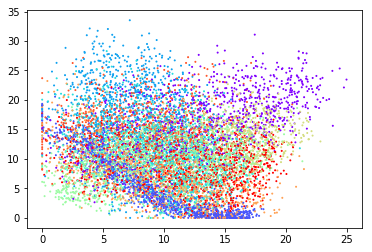

In [58]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')

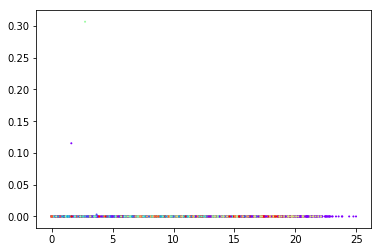

In [59]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')

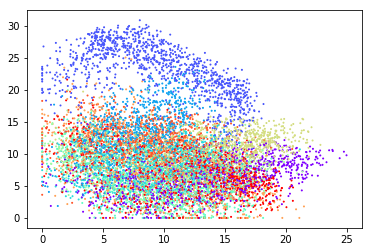

In [60]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,4], s=1, c=ytest, cmap='rainbow')

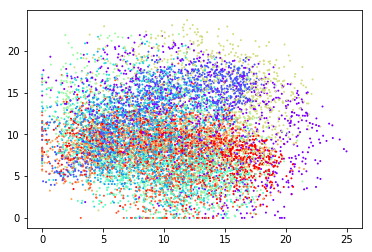

In [61]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,5], s=1, c=ytest, cmap='rainbow')

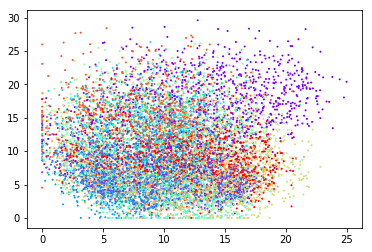

In [62]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,6], s=1, c=ytest, cmap='rainbow')

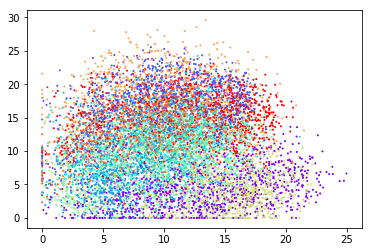

In [63]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,7], s=1, c=ytest, cmap='rainbow')

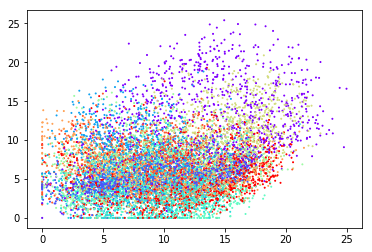

In [64]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,8], s=1, c=ytest, cmap='rainbow')

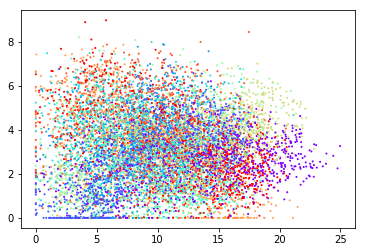

In [65]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,9], s=1, c=ytest, cmap='rainbow')

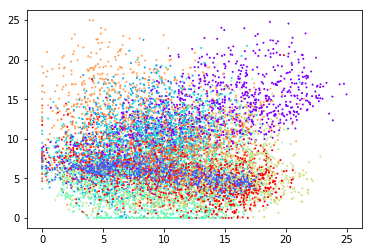

In [66]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,10], s=1, c=ytest, cmap='rainbow')

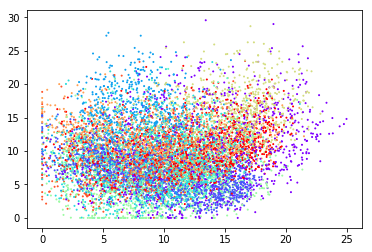

In [67]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,11], s=1, c=ytest, cmap='rainbow')

##### encoding_dim = 14

In [139]:
encoding_dim = 14

x = input_img = Input(shape=(784,))

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)


autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [140]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [141]:
autoencoder.fit(xtrain, xtrain, 
                epochs=20, 
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.3586 - val_loss: 0.2638
Epoch 2/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2580 - val_loss: 0.2529
Epoch 3/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.2443 - val_loss: 0.2344
Epoch 4/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.2289 - val_loss: 0.2231
Epoch 5/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.2179 - val_loss: 0.2064
Epoch 6/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2002 - val_loss: 0.1939
Epoch 7/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.1905 - val_loss: 0.1848
Epoch 8/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.1810 - val_loss: 0.1749
Epoch 9/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.1746 - val_l

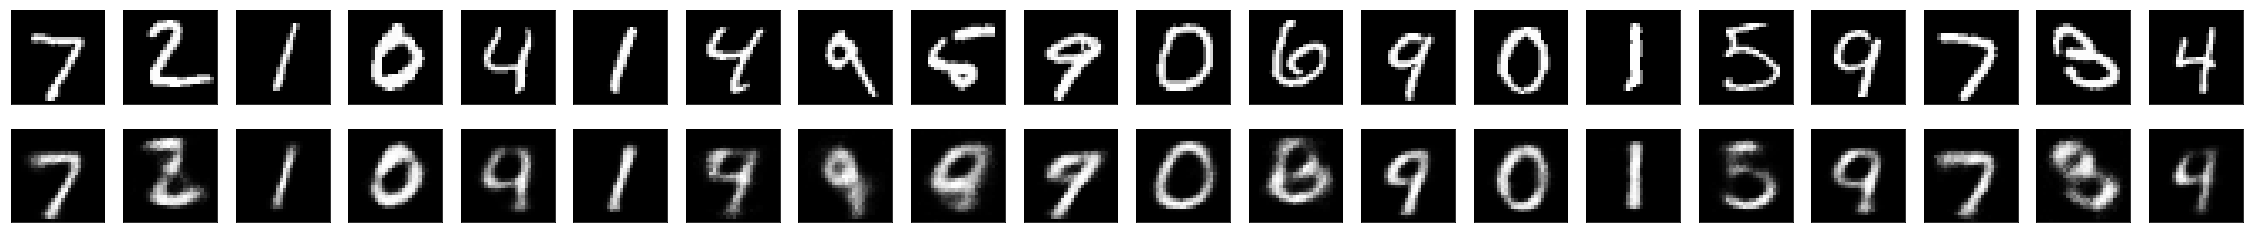

In [142]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 20 # how many digits we will display
plt.figure(figsize=(40,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [143]:
encoded_imgs

array([[ 0.       , 14.859408 ,  0.       , ..., 23.466324 ,  9.288714 ,
        13.664336 ],
       [ 2.1738753,  6.900824 ,  0.       , ...,  1.5002581, 13.707492 ,
         4.802559 ],
       [ 0.       , 19.661789 ,  0.3742359, ...,  9.681023 ,  3.2274203,
         8.529593 ],
       ...,
       [ 3.104886 , 10.343577 ,  0.       , ..., 14.732019 ,  4.1689095,
        14.716271 ],
       [ 1.1067344, 10.662821 ,  0.       , ...,  4.278081 ,  4.5568156,
        14.341967 ],
       [ 3.9848022, 12.015316 ,  0.       , ...,  3.3018773, 18.594254 ,
        11.782704 ]], dtype=float32)

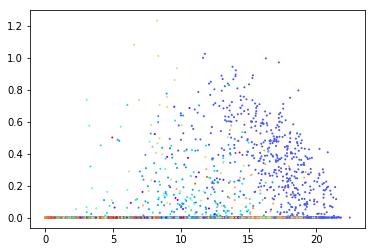

In [144]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')

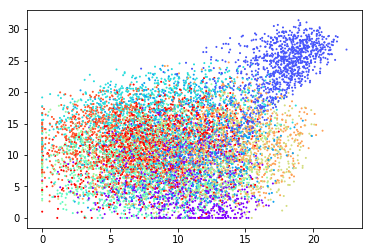

In [145]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')

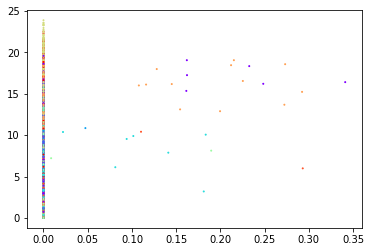

In [76]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,4], s=1, c=ytest, cmap='rainbow')

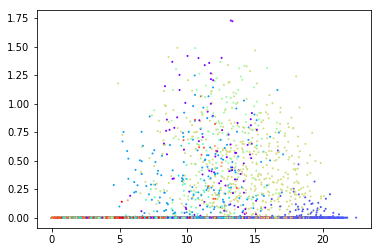

In [146]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,5], s=1, c=ytest, cmap='rainbow')

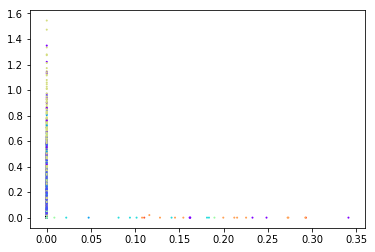

In [78]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,6], s=1, c=ytest, cmap='rainbow')

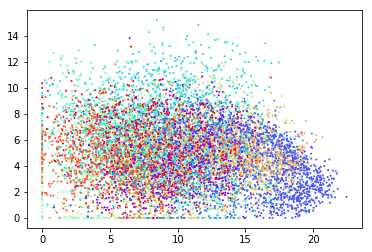

In [147]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,7], s=1, c=ytest, cmap='rainbow')

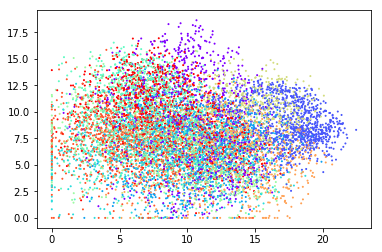

In [148]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,8], s=1, c=ytest, cmap='rainbow')

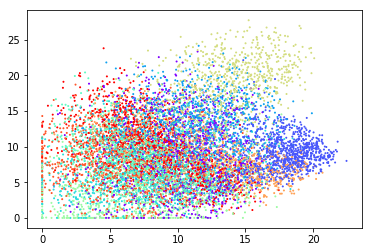

In [149]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,9], s=1, c=ytest, cmap='rainbow')

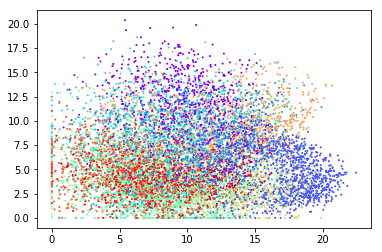

In [150]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,10], s=1, c=ytest, cmap='rainbow')

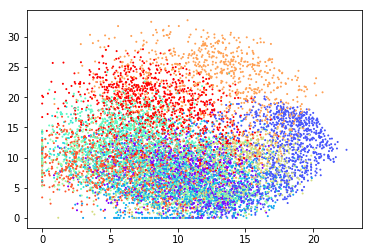

In [151]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,11], s=1, c=ytest, cmap='rainbow')

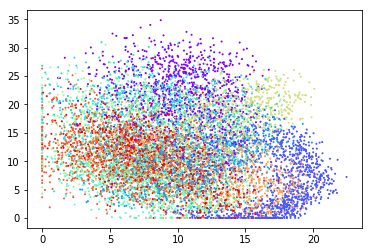

In [152]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,12], s=1, c=ytest, cmap='rainbow')

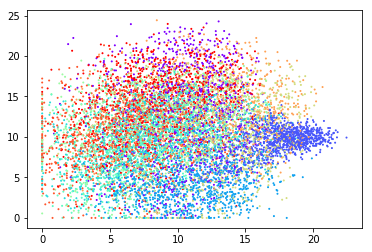

In [153]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,13], s=1, c=ytest, cmap='rainbow')

##### encoding_dim = 16

In [86]:
encoding_dim = 16

x = input_img = Input(shape=(784,))

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)


autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [87]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [88]:
autoencoder.fit(xtrain, xtrain, 
                epochs=20, 
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.3466 - val_loss: 0.2634
Epoch 2/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.2571 - val_loss: 0.2509
Epoch 3/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.2384 - val_loss: 0.2260
Epoch 4/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.2219 - val_loss: 0.2131
Epoch 5/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.2056 - val_loss: 0.1984
Epoch 6/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.1945 - val_loss: 0.1877
Epoch 7/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.1840 - val_loss: 0.1772
Epoch 8/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.1748 - val_loss: 0.1702
Epoch 9/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.1687 - val_loss: 

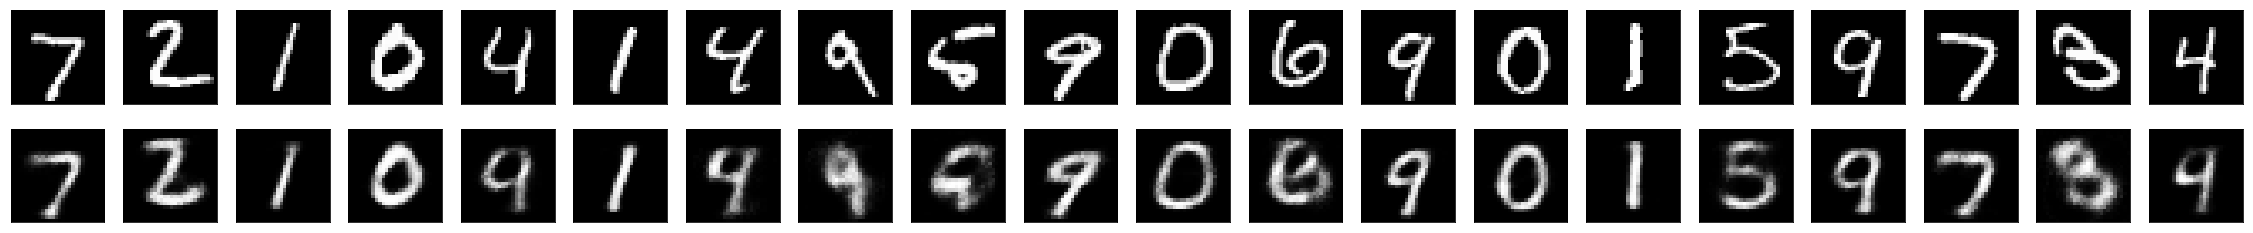

In [89]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 20 # how many digits we will display
plt.figure(figsize=(40,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [90]:
encoded_imgs

array([[ 3.132423 ,  0.       ,  1.6359711, ..., 12.996634 , 13.493368 ,
         8.026721 ],
       [13.223631 ,  0.       ,  3.590134 , ...,  6.863959 ,  3.639896 ,
         9.792712 ],
       [ 9.949705 ,  0.       ,  4.0781894, ...,  3.8358529, 13.531752 ,
         0.       ],
       ...,
       [ 7.948588 ,  0.       ,  4.3044896, ...,  1.1702816, 16.168947 ,
         7.8610644],
       [ 1.1372877,  0.       ,  4.405115 , ...,  5.336676 , 11.700041 ,
         3.1743908],
       [13.630959 ,  1.3767562,  3.7193718, ...,  3.7172458,  2.7565584,
        17.947676 ]], dtype=float32)

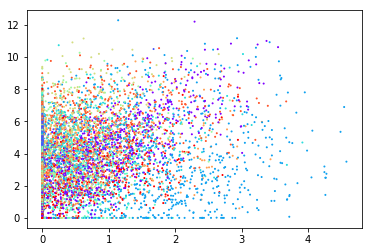

In [91]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')

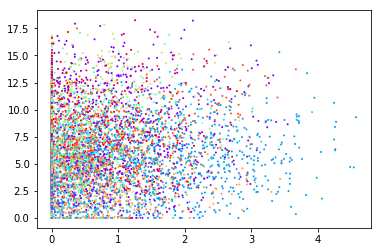

In [92]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')

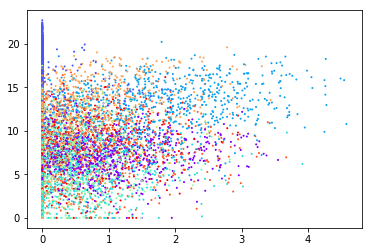

In [93]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,4], s=1, c=ytest, cmap='rainbow')

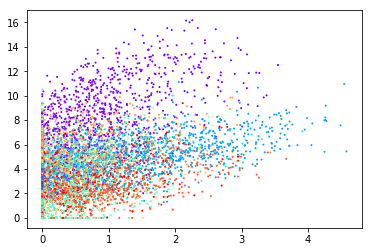

In [94]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,5], s=1, c=ytest, cmap='rainbow')

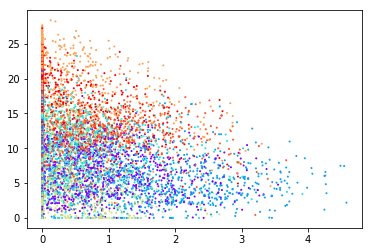

In [95]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,6], s=1, c=ytest, cmap='rainbow')

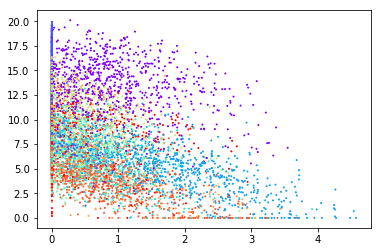

In [96]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,7], s=1, c=ytest, cmap='rainbow')

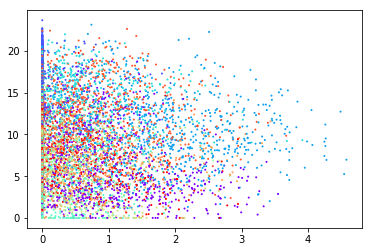

In [97]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,8], s=1, c=ytest, cmap='rainbow')

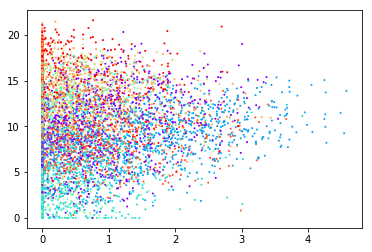

In [98]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,9], s=1, c=ytest, cmap='rainbow')

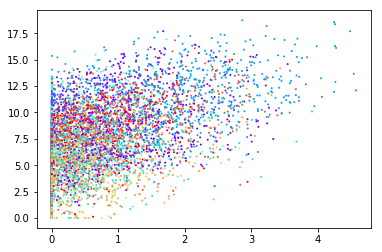

In [99]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,10], s=1, c=ytest, cmap='rainbow')

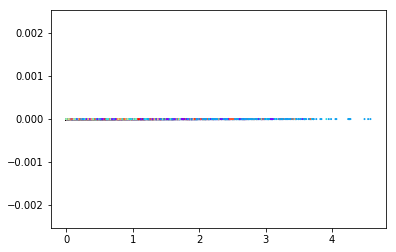

In [100]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,11], s=1, c=ytest, cmap='rainbow')

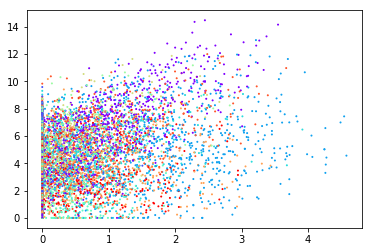

In [101]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,12], s=1, c=ytest, cmap='rainbow')

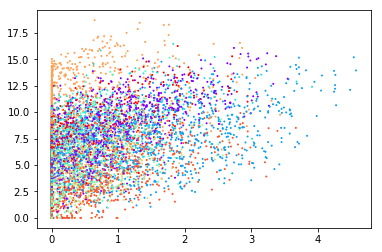

In [102]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,13], s=1, c=ytest, cmap='rainbow')

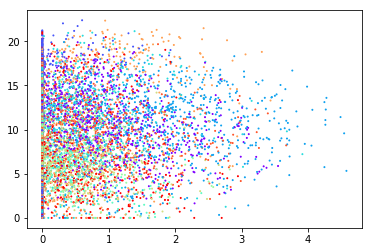

In [103]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,14], s=1, c=ytest, cmap='rainbow')

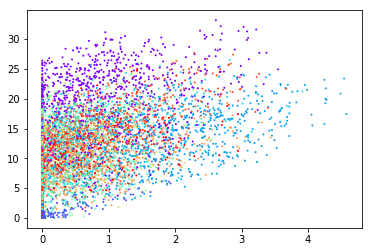

In [104]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,15], s=1, c=ytest, cmap='rainbow')

We can see that `encoding_dim`=16 has the lowest loss, 13.57, and val_loss, 13.32.

#### 3. Apply noise to only the input of the autoencoder (not the output). Demonstrate that you autodecoder can strip out noise.

In [3]:
xtrain_noise = xtrain + np.random.rand(*xtrain.shape)
xtest_noise = xtest + np.random.rand(*xtest.shape)

In [4]:
encoding_dim = 16

x = input_img = Input(shape=(784,))

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)


autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
autoencoder.fit(xtrain_noise, xtrain, 
                epochs=20, 
                batch_size=256,
                shuffle=True,
                validation_data=(xtest_noise, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.2968 - val_loss: 0.2610
Epoch 2/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.2563 - val_loss: 0.2501
Epoch 3/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.2395 - val_loss: 0.2331
Epoch 4/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.2268 - val_loss: 0.2201
Epoch 5/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.2141 - val_loss: 0.2056
Epoch 6/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.1995 - val_loss: 0.1927
Epoch 7/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.1895 - val_loss: 0.1843
Epoch 8/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.1826 - val_loss: 0.1809
Epoch 9/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.1780 - val_

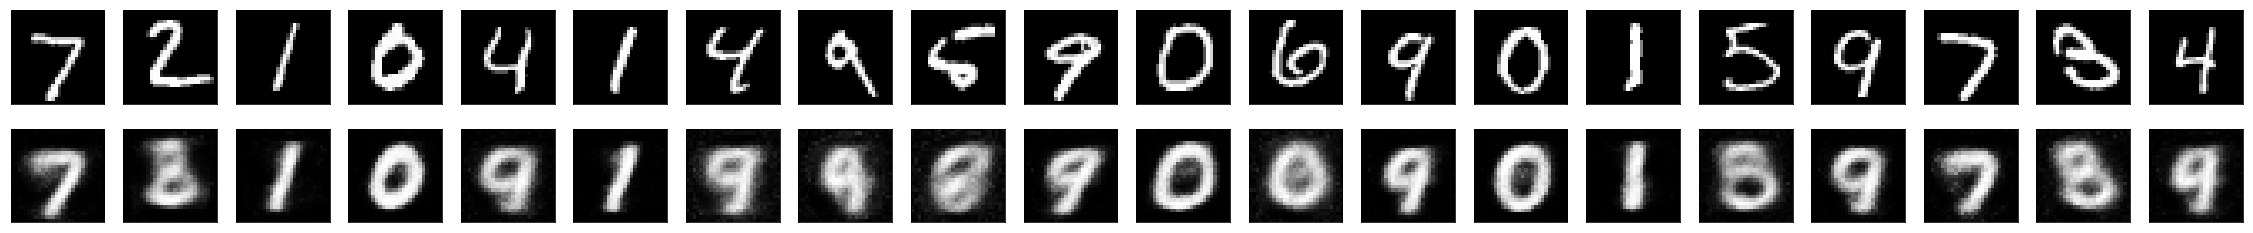

In [8]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 20 # how many digits we will display
plt.figure(figsize=(40,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

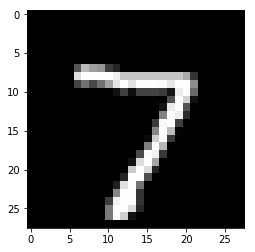

In [9]:
plt.imshow(xtest[0].reshape(28,28))

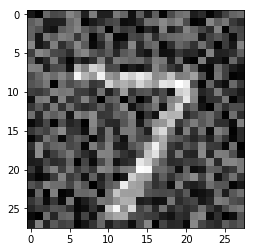

In [10]:
plt.imshow(xtest_noise[0].reshape(28,28))

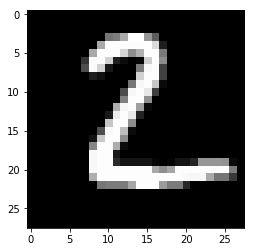

In [11]:
plt.imshow(xtest[1].reshape(28,28))

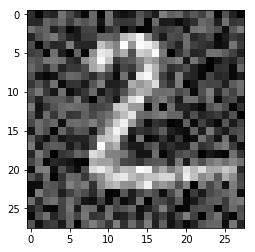

In [33]:
plt.imshow(xtest_noise[1].reshape(28,28))

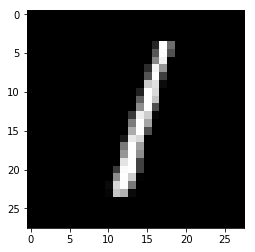

In [12]:
plt.imshow(xtest[2].reshape(28,28))

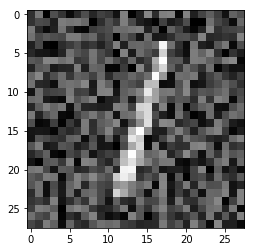

In [34]:
plt.imshow(xtest_noise[2].reshape(28,28))

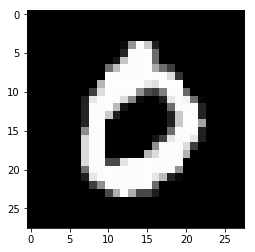

In [13]:
plt.imshow(xtest[3].reshape(28,28))

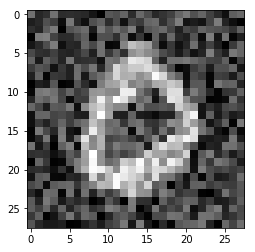

In [35]:
plt.imshow(xtest_noise[3].reshape(28,28))

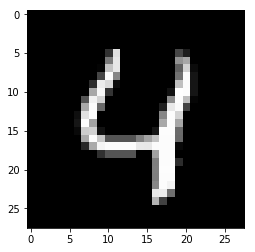

In [14]:
plt.imshow(xtest[4].reshape(28,28))

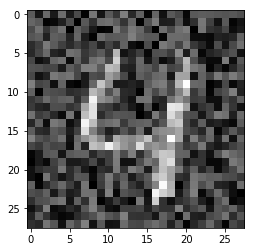

In [36]:
plt.imshow(xtest_noise[4].reshape(28,28))

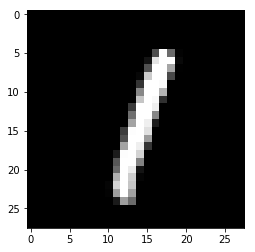

In [15]:
plt.imshow(xtest[5].reshape(28,28))

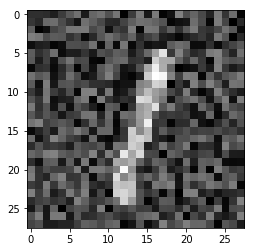

In [37]:
plt.imshow(xtest_noise[5].reshape(28,28))

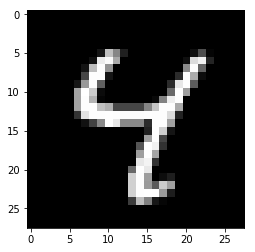

In [16]:
plt.imshow(xtest[6].reshape(28,28))

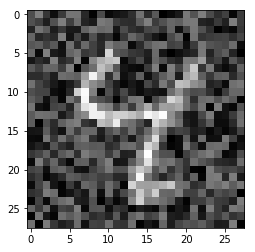

In [38]:
plt.imshow(xtest_noise[6].reshape(28,28))

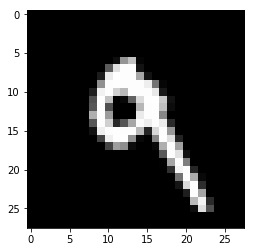

In [17]:
plt.imshow(xtest[7].reshape(28,28))

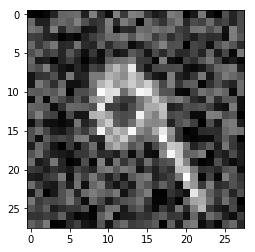

In [39]:
plt.imshow(xtest_noise[7].reshape(28,28))

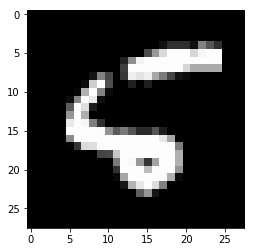

In [18]:
plt.imshow(xtest[8].reshape(28,28))

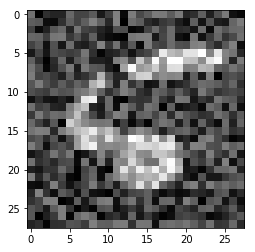

In [40]:
plt.imshow(xtest_noise[8].reshape(28,28))

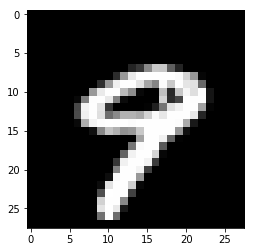

In [19]:
plt.imshow(xtest[9].reshape(28,28))

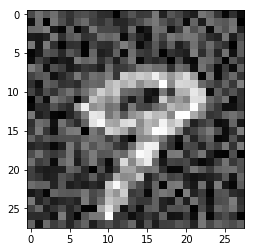

In [41]:
plt.imshow(xtest_noise[9].reshape(28,28))

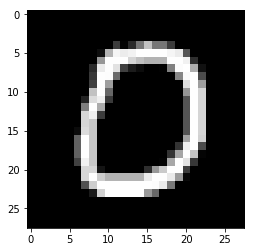

In [20]:
plt.imshow(xtest[10].reshape(28,28))

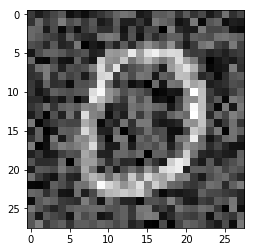

In [42]:
plt.imshow(xtest_noise[10].reshape(28,28))

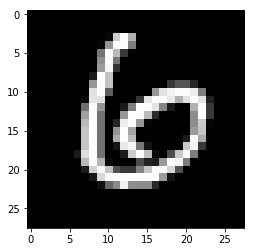

In [21]:
plt.imshow(xtest[11].reshape(28,28))

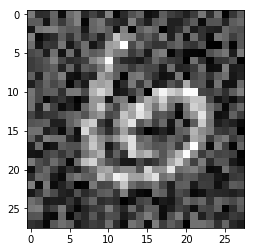

In [43]:
plt.imshow(xtest_noise[11].reshape(28,28))

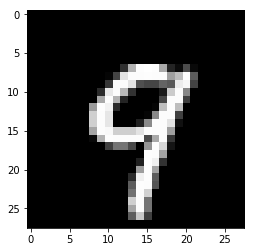

In [22]:
plt.imshow(xtest[12].reshape(28,28))

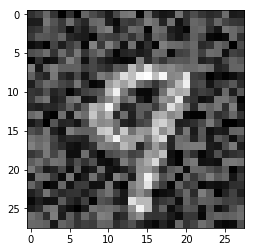

In [44]:
plt.imshow(xtest_noise[12].reshape(28,28))

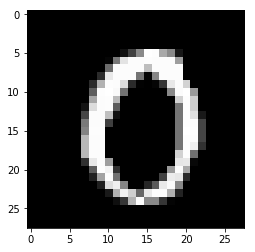

In [23]:
plt.imshow(xtest[13].reshape(28,28))

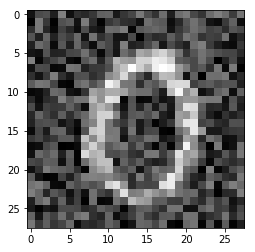

In [45]:
plt.imshow(xtest_noise[13].reshape(28,28))

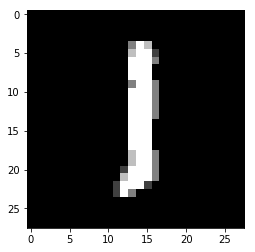

In [24]:
plt.imshow(xtest[14].reshape(28,28))

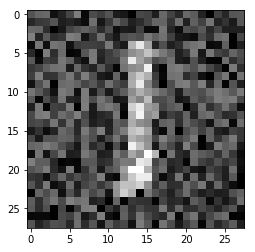

In [46]:
plt.imshow(xtest_noise[14].reshape(28,28))

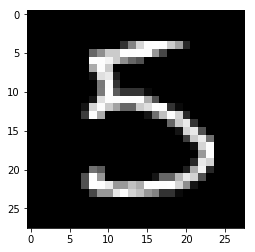

In [25]:
plt.imshow(xtest[15].reshape(28,28))

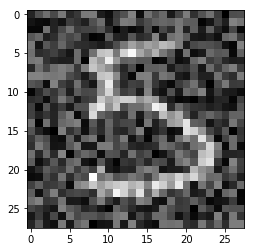

In [47]:
plt.imshow(xtest_noise[15].reshape(28,28))

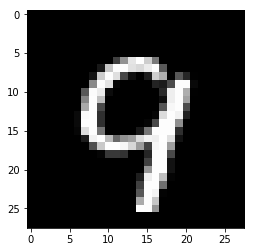

In [26]:
plt.imshow(xtest[16].reshape(28,28))

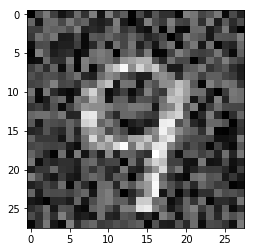

In [48]:
plt.imshow(xtest_noise[16].reshape(28,28))

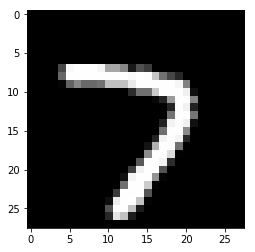

In [27]:
plt.imshow(xtest[17].reshape(28,28))

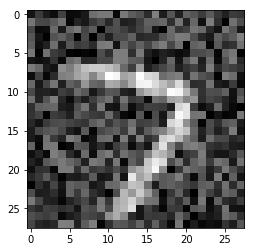

In [49]:
plt.imshow(xtest_noise[17].reshape(28,28))

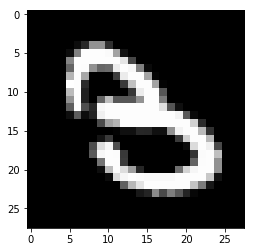

In [28]:
plt.imshow(xtest[18].reshape(28,28))

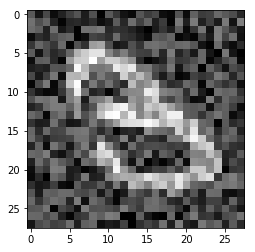

In [50]:
plt.imshow(xtest_noise[18].reshape(28,28))

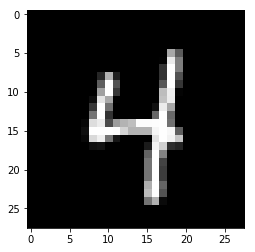

In [29]:
plt.imshow(xtest[19].reshape(28,28))

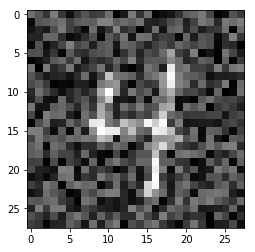

In [51]:
plt.imshow(xtest_noise[19].reshape(28,28))